## **<center>Supervised Machine Learning</center>**
## <center>XGBoost</center>
### <center>Classification</center>

### **WORKING ENVIRONMENT SET UP**

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# Tree Visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 



/Users/carloseduardo/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## LOAD DATA

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

### **Description**

Fields description follow:

* preg = Number of times pregnant

* plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

* pres = Diastolic blood pressure (mm Hg)

* skin = Triceps skin fold thickness (mm)

* test = 2-Hour serum insulin (mu U/ml)

* mass = Body mass index (weight in kg/(height in m)^2)

* pedi = Diabetes pedigree function

* age = Age (years)

* class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [2]:
df = pd.read_csv('data/pima.csv', delimiter =',', header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#renaming column names for better understanding 
df.columns = ["pregnancies", "glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]

In [5]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Descriptive Analysis

In [6]:
df.isna().sum()

pregnancies                   0
glucose                       0
blood_pressure                0
skin_thickness                0
insulin                       0
bmi                           0
Diabetes_Pedigree_Function    0
age                           0
outcome                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#handling missing data 
import numpy as np
df.glucose.replace(0,np.nan,inplace = True)
df.insulin.replace(0,np.nan,inplace = True)
df.blood_pressure.replace(0,np.nan,inplace = True)
df.bmi.replace(0,np.nan,inplace = True)
df.skin_thickness.replace(0,np.nan,inplace = True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     763 non-null    float64
 2   blood_pressure              733 non-null    float64
 3   skin_thickness              541 non-null    float64
 4   insulin                     394 non-null    float64
 5   bmi                         757 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [12]:
#filling the NaN values with mean value, mainly targetting skin_thickness.
df = df.fillna(df.median())
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


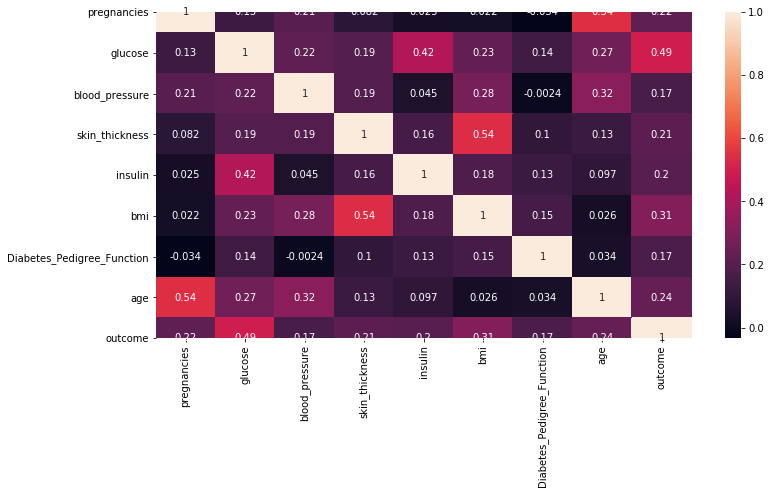

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot = True)

In [17]:
df['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

## Train Test Split

In [18]:
X = df.drop('outcome',axis=1)
Y = df['outcome']

In [27]:
seed = 9
test_size = 0.33 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
                                                    random_state=seed)

eval_set = [(X_test,y_test) ]

## Training a XGBoost Model

In [43]:
model = XGBClassifier(n_estimators=50, nrounds = 10000, learning_rate = 0.02, num_parallel_tree=5)
model.fit(X_train, y_train, eval_set = eval_set, early_stopping_rounds= 10000)

[14:46:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.31496
Will train until validation_0-error hasn't improved in 10000 rounds.
[1]	validation_0-error:0.30709
[2]	validation_0-error:0.29528
[3]	validation_0-error:0.29528
[4]	validation_0-error:0.29528
[5]	validation_0-error:0.29528
[6]	validation_0-error:0.29528
[7]	validation_0-error:0.29528
[8]	validation_0-error:0.28347
[9]	validation_0-error:0.28347
[10]	validation_0-error:0.27953
[11]	validation_0-error:0.28347
[12]	validation_0-error:0.28347
[13]	validation_0-error:0.28347
[14]	validation_0-error:0.28347
[15]	validation_0-error:0.28347
[16]	validation_0-error:0.28740
[17]	validation_0-error:0.27953
[18]	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, nrounds=10000, num_parallel_tree=5,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
model.fit

<bound method XGBClassifier.fit of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [21]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(objective='binary:logistic', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective function to be used (see note below).
 |      booster: string
 |          Specify which booster to use: gbtree, gblinear or dart.
 |      tree_method: string
 |          Specify which tree method to use.  Default to auto.  If this parameter
 |          is set to default, XGBoost will choose the mos

## Predictions and Evaluation 

In [22]:
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

In [24]:
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.23%


## Feature Importance

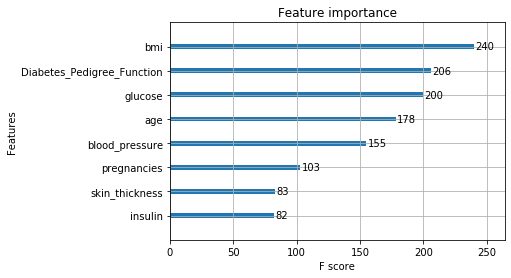

In [25]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model) 
pyplot.show()